In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from itertools import product
import random

In [3]:
data = pd.read_csv('./train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
Image    25361 non-null object
Id       25361 non-null object
dtypes: object(2)
memory usage: 396.3+ KB


In [6]:
data.Id.nunique()

5005

In [12]:
data[data.Id == 'new_whale'].shape

(9664, 2)

/anaconda3/envs/devenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


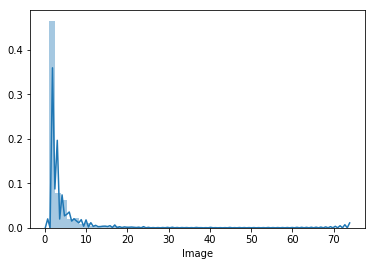

In [19]:
pic_counts = data.groupby('Id').count().reset_index()
sns.distplot(pic_counts[pic_counts.Image < 5000].Image)

In [72]:
pic_counts.head()

,Id,Image
0,new_whale,9664
1,w_0003639,1
2,w_0003c59,1
3,w_0027efa,10
4,w_00289b1,2


In [71]:
len(pic_counts[pic_counts.Image==1].Id.tolist()), \
len(pic_counts[(pic_counts.Image>1) & (pic_counts.Image<5000)].Id.tolist()), \
len(pic_counts[pic_counts.Image>5000].Id.tolist())

(2073, 2931, 1)

In [20]:
data_fil = data[data.Id != 'new_whale']
data_fil.shape

(15697, 2)

In [52]:
data_cross = data_fil.merge(data_fil, on='Id', how='inner')
data_cross = data_cross[data_cross.Image_x != data_cross.Image_y]
data_cross['similar'] = 1
data_cross.shape

(139874, 4)

In [61]:
pic_counts[pic_counts.Image==1].head()

,Id,Image
1,w_0003639,1
2,w_0003c59,1
5,w_002c810,1
6,w_0032a46,1
9,w_0066399,1


In [55]:
data_cross[data_cross.Id=='w_0003639']

,Image_x,Id,Image_y,similar


In [56]:
data[data.Id=='w_20df2c5']

,Image,Id
2,00029d126.jpg,w_20df2c5
14794,94e15dfd2.jpg,w_20df2c5
16550,a6766b182.jpg,w_20df2c5
21159,d5098b5a1.jpg,w_20df2c5


In [57]:
data[data.Id=='w_0003639']

,Image,Id
13008,833675975.jpg,w_0003639


In [78]:
data_notsim = list(product(data_cross.Image_x.unique().tolist(), 
                           data[data.Id.isin(pic_counts[pic_counts.Image==1].Id.tolist())].Image.tolist()))
len(data_notsim)

28242552

In [79]:
data_notsim1 = list(product(data_cross.Image_x.unique().tolist(), 
                           data[data.Id=='new_whale'].Image.tolist()))
len(data_notsim1)

131662336

In [81]:
data_diff = data_notsim + data_notsim1
len(data_diff)

159904888

In [83]:
data_diff = pd.DataFrame(data_diff)
data_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159904888 entries, 0 to 159904887
Data columns (total 2 columns):
0    object
1    object
dtypes: object(2)
memory usage: 2.4+ GB


In [85]:
data_sim = data_cross[['Image_x', 'Image_y', 'similar']]
data_sim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139874 entries, 1 to 155493
Data columns (total 3 columns):
Image_x    139874 non-null object
Image_y    139874 non-null object
similar    139874 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [86]:
data_diff.columns = ['Image_x', 'Image_y']
data_diff['similar'] = 0
data_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159904888 entries, 0 to 159904887
Data columns (total 3 columns):
Image_x    object
Image_y    object
similar    int64
dtypes: int64(1), object(2)
memory usage: 3.6+ GB


In [89]:
data_sim.shape[0]/(data_sim.shape[0] + data_diff.shape[0])

0.0008739679965283712

In [96]:
random.seed(42)
downsample = random.sample(range(0, data_diff.shape[0]), data_sim.shape[0])
len(downsample)

139874

In [106]:
data_diff = data_diff.iloc[downsample]
data_diff.shape

(139874, 3)

In [107]:
image_df_downsampled = data_sim.append(data_diff)
image_df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279748 entries, 1 to 15355941
Data columns (total 3 columns):
Image_x    279748 non-null object
Image_y    279748 non-null object
similar    279748 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.5+ MB


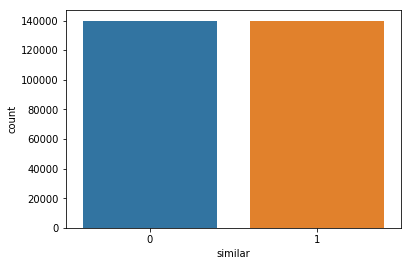

In [108]:
sns.countplot(image_df_downsampled.similar)

In [109]:
image_df_downsampled[image_df_downsampled.similar==0].tail()

,Image_x,Image_y,similar
55527924,839b7e9c8.jpg,6691addd8.jpg,0
10534649,f8e0c1305.jpg,d37a66f0b.jpg,0
9218641,ea925b05b.jpg,0225391f4.jpg,0
1265867,7f7045705.jpg,a094fabb8.jpg,0
15355941,39aca3bf8.jpg,938f9390d.jpg,0


In [114]:
data[data.Image=='0af805558.jpg']

,Image,Id
1111,0af805558.jpg,w_f48451c


In [115]:
data[data.Id=='w_f48451c']

,Image,Id
0,0000e88ab.jpg,w_f48451c
1111,0af805558.jpg,w_f48451c
2746,1c351b88e.jpg,w_f48451c
10983,6f7abb1be.jpg,w_f48451c
11786,77a44bf94.jpg,w_f48451c
12019,79c77838d.jpg,w_f48451c
14338,9064d5875.jpg,w_f48451c
15862,9fc84d2ae.jpg,w_f48451c
19245,c1ec12eb6.jpg,w_f48451c
19675,c64e5e861.jpg,w_f48451c


In [113]:
image_df_downsampled.head()

,Image_x,Image_y,similar
1,0000e88ab.jpg,0af805558.jpg,1
2,0000e88ab.jpg,1c351b88e.jpg,1
3,0000e88ab.jpg,6f7abb1be.jpg,1
4,0000e88ab.jpg,77a44bf94.jpg,1
5,0000e88ab.jpg,79c77838d.jpg,1
